d:\Users\epiph\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 345, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4673
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492857 -> initscore=-0.028573
[LightGBM] [Info] Start training from score -0.028573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

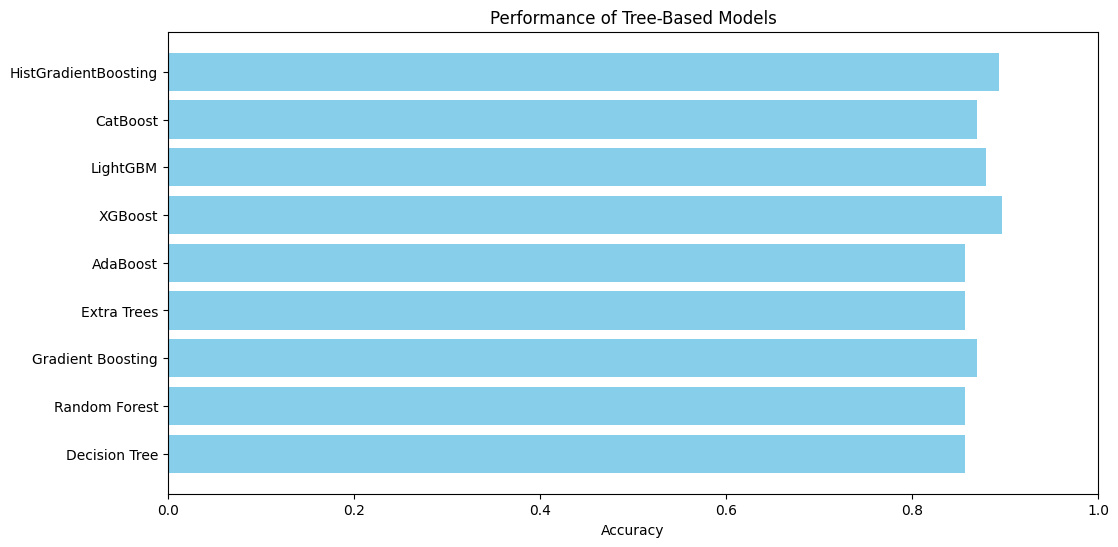

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define all tree-based models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(silent=True, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42)
}

# Train, predict and evaluate all models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    except Exception as e:
        results[name] = f"Failed: {str(e)}"

# Plot results
plt.figure(figsize=(12, 6))
names = list(results.keys())
accuracies = [results[name] if isinstance(results[name], float) else 0 for name in names]

plt.barh(names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Performance of Tree-Based Models")
plt.xlim(0, 1.0)
plt.show()


### **决策树与基于树的模型（Tree-Based Models）**：
1. **决策树 (Decision Tree)**
2. **随机森林 (Random Forest)**
3. **梯度提升树 (Gradient Boosting)**
4. **极端随机树 (Extra Trees)**
5. **AdaBoost (Adaptive Boosting)**
6. **XGBoost**
7. **LightGBM**
8. **CatBoost**
9. **HistGradientBoosting (Scikit-learn 提供)**
10. **多层次决策树 (Multi-Level Decision Trees)**

### **模型特点、适用场景及优缺点**

#### **1. 决策树 (Decision Tree)**
- **特点**：
  - 基于树结构递归分割数据，学习特征与目标之间的关系。
  - 能够处理非线性关系，生成容易理解的规则。
- **适用场景**：
  - 特征之间的关系较为简单，且需要可解释的模型。
  - 二分类、多分类任务。
- **优点**：
  - 易于理解和解释，生成的模型直观。
  - 对缺失数据具有一定鲁棒性。
- **缺点**：
  - 容易过拟合，尤其是深度过大的树。
  - 对噪声和小的波动敏感。

---

#### **2. 随机森林 (Random Forest)**
- **特点**：
  - 基于决策树的集成学习模型，使用多个决策树并通过投票/平均的方式进行决策。
  - 通过随机选择特征和样本减少过拟合，增强了模型的鲁棒性。
- **适用场景**：
  - 需要处理复杂数据且对解释性要求较低的任务。
  - 适合大规模数据和多维数据的分类任务。
- **优点**：
  - 高准确性，避免过拟合。
  - 可处理高维数据，支持回归和分类。
  - 具有内置的特征重要性评估功能。
- **缺点**：
  - 模型较为复杂，训练和预测速度较慢。
  - 难以解释模型结果。

---

#### **3. 梯度提升树 (Gradient Boosting)**
- **特点**：
  - 一种集成学习方法，通过一系列弱分类器（如决策树）顺序地进行训练，每个分类器都试图修正上一个分类器的错误。
  - 通过逐步优化来提升模型性能。
- **适用场景**：
  - 数据集较小或特征非常重要时，适合高效的二分类和多分类任务。
- **优点**：
  - 性能通常比随机森林更好，特别是在有很多复杂模式的任务中。
  - 对数据中的噪声具有一定鲁棒性。
- **缺点**：
  - 训练时间长，尤其是当数据集非常大时。
  - 对超参数非常敏感，需要仔细调整。

---

#### **4. 极端随机树 (Extra Trees)**
- **特点**：
  - 通过完全随机化决策树的分割方式来创建多个决策树，减少过拟合，提高泛化能力。
- **适用场景**：
  - 高维度数据，快速训练和高效计算的需求。
- **优点**：
  - 快速训练，避免过拟合。
  - 对噪声具有鲁棒性。
- **缺点**：
  - 由于完全随机的分割，有时在复杂数据上性能不如其他模型。

---

#### **5. AdaBoost**
- **特点**：
  - 通过调整样本权重来迭代训练多个弱分类器，最终通过加权投票方式得到最终预测结果。
- **适用场景**：
  - 弱分类器（如决策树）无法很好区分的任务。
  - 适用于二分类任务。
- **优点**：
  - 对噪声和小数据集非常鲁棒。
  - 能够通过多个弱分类器弥补单个分类器的不足。
- **缺点**：
  - 对离群点敏感，容易被噪声数据影响。
  - 训练速度较慢。

---

#### **6. XGBoost**
- **特点**：
  - 基于梯度提升树（GBDT）的优化算法，广泛应用于机器学习竞赛中。
  - 包括正则化项，进一步增强了模型的鲁棒性。
- **适用场景**：
  - 大规模数据集，且需要极高精度和性能的场景。
  - 在特征非常复杂或者有多个分类变量时，通常表现出色。
- **优点**：
  - 高性能，通常在大数据集上表现出色。
  - 具有强大的调参选项，能够进一步提高模型性能。
- **缺点**：
  - 训练速度较慢，特别是在大数据集上。
  - 对于调参的需求较高。

---

#### **7. LightGBM**
- **特点**：
  - 类似于 XGBoost，但采用更高效的分裂方式（基于直方图的决策树学习）。
  - 可以在大规模数据集上更快地训练。
- **适用场景**：
  - 特别适合大规模数据集，尤其是在训练时间上有严格要求时。
  - 在分类和回归任务中都能表现出色。
- **优点**：
  - 高效的训练速度，适合大数据。
  - 支持多类别任务，能够处理类别特征。
- **缺点**：
  - 对于数据预处理有较高要求。
  - 在小数据集上的性能可能不如其他模型。

---

#### **8. CatBoost**
- **特点**：
  - 类似于 XGBoost 和 LightGBM，但专门优化了分类特征的处理，尤其对于类别数据表现出色。
- **适用场景**：
  - 特别适合包含类别数据的任务，特别是在大规模数据集上。
- **优点**：
  - 对类别数据具有良好的支持。
  - 性能稳定，适合分类任务。
- **缺点**：
  - 训练较慢，特别是在特征非常复杂的场景。

---

#### **9. HistGradientBoosting (Scikit-learn)**
- **特点**：
  - 一种基于梯度提升的算法，但使用了直方图优化方法。
  - 适合大数据，

内存使用更高效。
- **适用场景**：
  - 大规模数据集，特别是在处理大量样本和特征时。
- **优点**：
  - 高效的内存使用，适合大规模数据集。
  - 训练速度快。
- **缺点**：
  - 只适合数值型数据，不像其他算法那样支持类别数据。

---

### **总结**

- **小数据集**：可以使用 `Decision Tree` 或 `AdaBoost`。
- **中等规模数据集**：推荐使用 `Random Forest` 或 `Gradient Boosting`。
- **大规模数据集**：使用 `XGBoost`、`LightGBM` 或 `CatBoost`。
- **需要类别数据处理**：可以选择 `CatBoost` 或 `LightGBM`，它们对类别特征处理较好。
